In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:/Study PDF/Python/Datsets/Salary_Dataset_with_Extra_Features.csv")

In [3]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [10]:
df[df.isnull()].count() 

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

checking for total number of companiers in the dataset.

In [18]:
#rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
df.rename(columns = {'Company Name':'Company_name'}, inplace = True)

In [20]:
#Lets change the column names for further exploratory data analysis

In [48]:
df.rename(columns = {'Job Title':'Job_title',
                    'Salaries Reported':'Salaries_reported',
                    'Employment Status':'Employement_status',
                    'Job Roles':'Job_roles'},inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              22770 non-null  float64
 1   Company_name        22770 non-null  object 
 2   Job_title           22770 non-null  object 
 3   Salary              22770 non-null  int64  
 4   Salaries_reported   22770 non-null  int64  
 5   Location            22770 non-null  object 
 6   Employement_status  22770 non-null  object 
 7   Job_roles           22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [26]:
company_names = df.Company_name.unique()

In [32]:
company_name_df = pd.DataFrame(company_names)

In [33]:
company_name_df

,0
0,Sasken
1,Advanced Millennium Technologies
2,Unacademy
3,SnapBizz Cloudtech
4,Appoids Tech Solutions
...,...
11256,Blu Ocean Innovations
11257,DiscoverWeb
11258,Unicon Systems
11259,Expert Solutions


In [ ]:
#Lets find the top 5 companies giving amount of salaries in total

In [36]:
df.groupby('Company_name')['Salary'].sum().sort_values(ascending=False).head()

Company_name
Amazon                       217344992
Tata Consultancy Services    138784640
Microsoft                    138708640
Accenture                     92718000
Thapar University             90000000
Name: Salary, dtype: int64

In [39]:
df.head(1).T

,0
Rating,3.8
Company_name,Sasken
Job_title,Android Developer
Salary,400000
Salaries_reported,3
Location,Bangalore
Employement_status,Full Time
Job Roles,Android


In [45]:
df['Company_name'].value_counts().sort_values(ascending=False).head(5)

Tata Consultancy Services         271
Amazon                            184
Infosys                           169
Accenture                         150
Cognizant Technology Solutions    144
Name: Company_name, dtype: int64

In [61]:
values = df.groupby('Job_roles')['Salary'].sum().sort_values(ascending=False)

In [62]:
df.groupby('Job_title')['Salary'].sum().sort_values(ascending=False).head()

Job_title
Software Development Engineer          1837471760
Software Development Engineer (SDE)    1429870256
Android Developer                      1030946784
Front End Developer                     818055456
Test Engineer                           659715296
Name: Salary, dtype: int64

In [63]:
df.groupby('Job_title')['Salary'].sum().sort_values(ascending=False).tail()

Job_title
Jr Backend Developer - Intern                              60000
IOS Engineer Contractor                                    36000
Java Software Engineer Contractor                          31680
Senior Software Development Engineer In Test Contractor    27456
Ios App Developer - Intern                                 24000
Name: Salary, dtype: int64

In [73]:
import matplotlib.pyplot as plt
import plotly.express as px

In [74]:
values

Job_roles
SDE         6986600576
Android     1666607904
Frontend    1319643488
IOS         1133959680
Java        1049231008
Backend      893730688
Testing      863558848
Database     829175200
Python       460263584
Web          415036496
Mobile       216159328
Name: Salary, dtype: int64

In [82]:
fig = px.bar(values,color=values.index,labels = {'value':'salary',
                                                'index':'JobRoles'})
fig.update_layout(showlegend=False,title_text='Job role wise total salary')

In [83]:
fig

In [85]:
df.head(5)

,Rating,Company_name,Job_title,Salary,Salaries_reported,Location,Employement_status,Job_roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [93]:
df.loc[df['Salary']>=1000000,['Job_title','Company_name','Salary']].count()

Job_title       5205
Company_name    5205
Salary          5205
dtype: int64

In [96]:
df['Salary'].max()

90000000

In [98]:
df.loc[df['Salary']==df['Salary'].max()]

,Rating,Company_name,Job_title,Salary,Salaries_reported,Location,Employement_status,Job_roles
18635,3.6,Thapar University,Software Development Engineer (SDE),90000000,1,New Delhi,Full Time,SDE


In [99]:
df.loc[df['Salary']==df['Salary'].min()]

,Rating,Company_name,Job_title,Salary,Salaries_reported,Location,Employement_status,Job_roles
22563,2.6,Keeves Technologies,Web Developer - Intern,2112,1,Bangalore,Intern,Web


In [100]:
#What is distribution of ratings given by employees?

<Axes: ylabel='Frequency'>

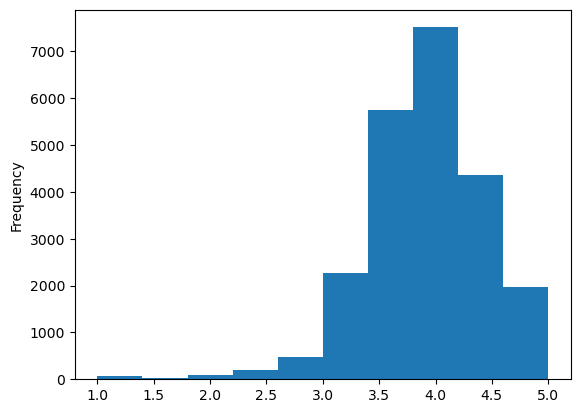

In [106]:
df['Rating'].plot(kind='hist')

In [107]:
#How does the average salary vary based on employment status?

In [112]:
df.groupby('Employement_status')['Salary'].mean()

Employement_status
Contractor    627362.364964
Full Time     733332.377035
Intern        357054.176638
Trainee       324303.030303
Name: Salary, dtype: float64

<Axes: xlabel='Employement_status'>

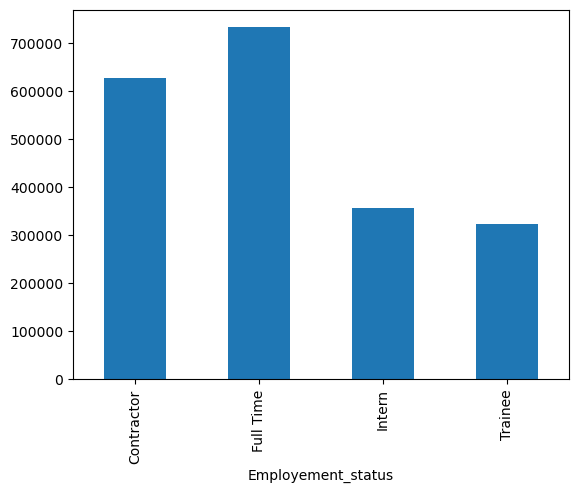

In [111]:
df.groupby('Employement_status')['Salary'].mean().plot(kind='bar')

In [ ]:
#Which job roles have the highest average salaries?

In [115]:
avg_sal_jr = df.groupby('Job_roles')['Salary'].mean()

In [128]:
fig = px.bar(avg_sal_jr,color=avg_sal_jr.index, labels={'value':'Average Salary',
                                                       'index':'Jobrole'})
fig = fig.update_layout(showlegend=False, title='Average salary')

In [129]:
fig.show()

In [130]:
#Is there a correlation between ratings and average salary for different job roles?

In [152]:
x = df.groupby('Job_roles')['Rating'].mean()
x

Job_roles
Android     3.893141
Backend     4.016750
Database    3.825780
Frontend    3.958784
IOS         3.905303
Java        3.849892
Mobile      3.976327
Python      3.965259
SDE         3.939765
Testing     3.828276
Web         3.935936
Name: Rating, dtype: float64

In [153]:
y = df.groupby('Job_roles')['Salary'].mean()
y

Job_roles
Android     565911.003056
Backend     748518.164154
Database    958584.046243
Frontend    610098.699954
IOS         695254.248927
Java        564709.907427
Mobile      882282.971429
Python      486022.791975
SDE         853794.522302
Testing     496298.188506
Web         415451.947948
Name: Salary, dtype: float64

In [154]:
c = df.Job_roles.unique()

In [155]:
c

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [170]:
#What is the distribution of average salary in different locations?

In [172]:
avg_salary_loc = df.groupby('Location')['Salary'].mean()

In [182]:
fig = px.bar(avg_salary_loc,color=avg_salary_loc.index,labels={'value':'Average Salary',
                                                             'index':'Location'})
fig = fig.update_layout(showlegend=False,title='Average Salary Location Wise')

In [183]:
fig

In [201]:
grouped = df.groupby(['Location','Job_roles']).size().unstack(fill_value=0)

<Figure size 1000x2000 with 0 Axes>

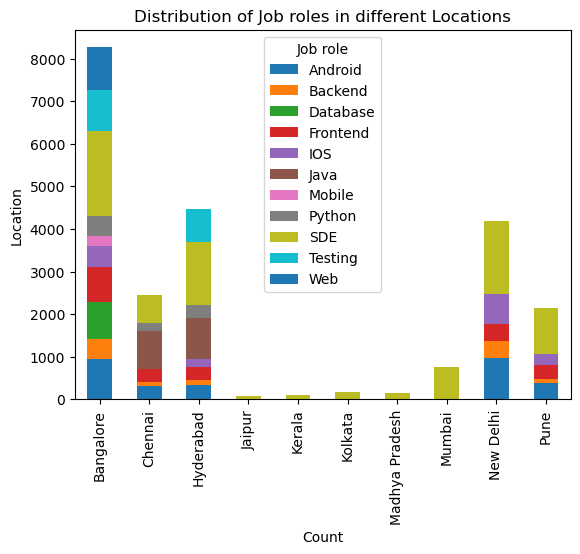

In [228]:
plt.figure(figsize=(10,20))
fig = grouped.plot.bar(stacked=True)
plt.title('Distribution of Job roles in different Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.legend(title='Job role')
#plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Salary', by='Job_roles')
plt.title('Box Plot of Salary by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()